<a href="https://colab.research.google.com/github/dau-J/2025-oss/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: /content/sample_data/california_housing_train.csv 데이터로부터 집 값을 예측하는 코드를 작성해줘

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 로드
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 특성(X)과 타겟(y) 분리
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# 데이터 전처리 (필요에 따라 추가)
# 예시: 결측치 처리, 원-핫 인코딩, 스케일링 등

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 훈련 (선형 회귀 모델 사용)
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 예측 결과 출력 (선택 사항)
# 예측 결과를 데이터프레임에 추가하여 출력
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())


Mean Squared Error: 4634658406.223264


## 새로운 데이터 예측

In [2]:
# 새로운 데이터 생성 (테스트 데이터셋에서 하나의 샘플 사용)
new_data = X_test.iloc[[0]]  # 첫 번째 샘플 사용

# 새로운 데이터 예측
new_prediction = model.predict(new_data)

print(f"New Prediction: {new_prediction}")


New Prediction: [143770.39502963]


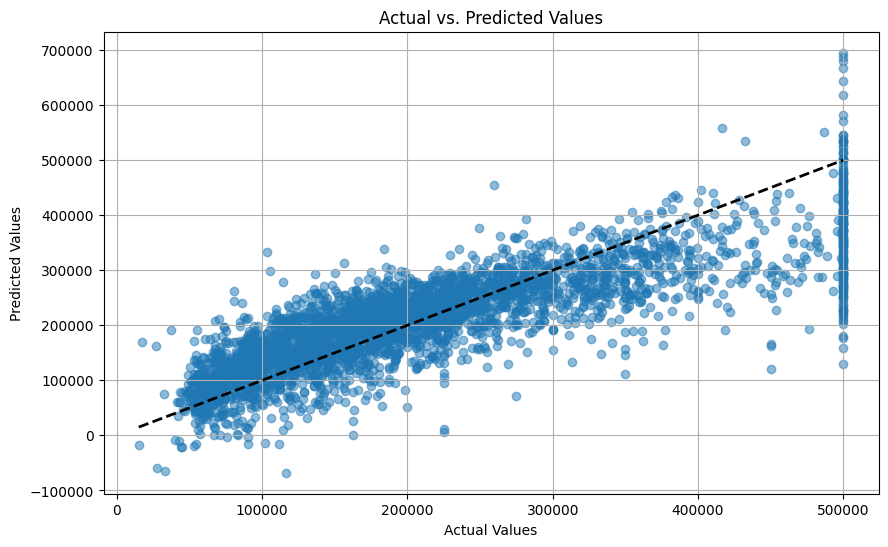

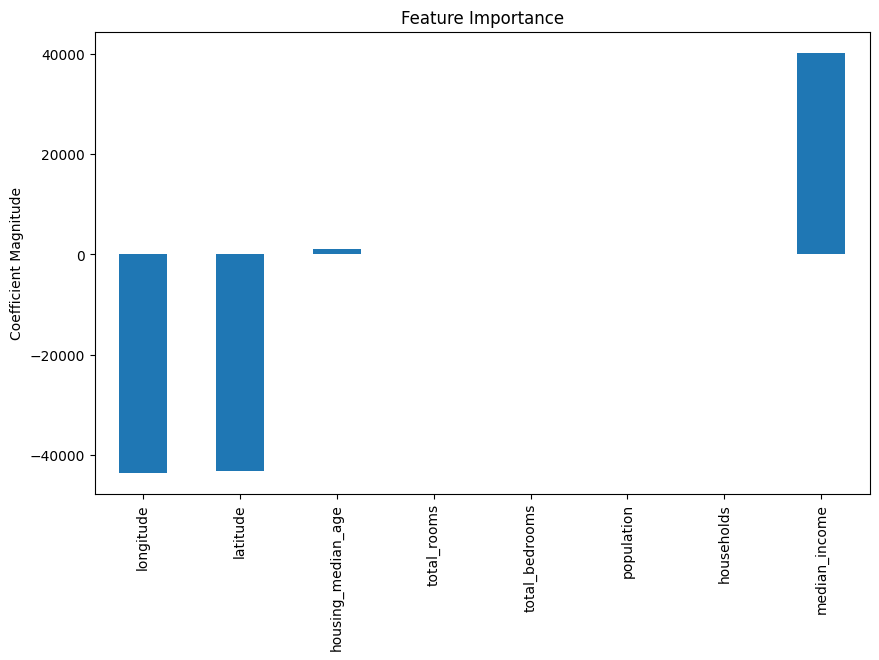

In [3]:
import matplotlib.pyplot as plt

# 실제값과 예측값을 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # 대각선 추가
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# 특성 중요도 시각화 (선형 회귀의 경우 계수를 사용)
plt.figure(figsize=(10, 6))
coefficients = pd.Series(model.coef_, X.columns)
coefficients.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Coefficient Magnitude')
plt.show()
